# Assignment 3

## 3.1: Different Architectures for Classifying Handwritten Digits

The feed-forward neural network for classifying handwritten digits from MNIST described in Chapter 3.6
(with code in the accompanying Jupyter notebook) achieves an accuracy of above 97%. However, this
comes at the cost of more than 111,000 trainable parameters. Experiment with different architectures
for this task to see whether you can achieve comparable performance with a simpler architecture. To
this end, try changing the number of layers and the number of neurons per layer. For each of the
architectures considered, list its total number of trainable parameters as well as the final accuracy
that it achieves on the test data.

### Architecture 1:

In [4]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.datasets import mnist

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 1s 866us/step - loss: 1.3128 - accuracy: 0.6477 - val_loss: 0.6303 - val_accuracy: 0.8519
Epoch 2/150
480/480 [==============================] - 0s 741us/step - loss: 0.5250 - accuracy: 0.8640 - val_loss: 0.4074 - val_accuracy: 0.8917
Epoch 3/150
480/480 [===

### Architecture 2:

In [5]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.datasets import mnist

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 0s 741us/step - loss: 1.3031 - accuracy: 0.6495 - val_loss: 0.7265 - val_accuracy: 0.8328
Epoch 2/150
480/480 [==============================] - 0s 630us/step - loss: 0.6203 - accuracy: 0.8426 - val_loss: 0.4961 - val_accuracy: 0.8739
Epoch 3/150
480/480 [==============================] - 0s 628us/step - loss: 0.4812 - accuracy: 0.8715 - val_loss: 0.4176 - val_accuracy: 0.8888
Epoch 4/150

## 3.2 Insensitivity of the Architecture to Permuted Inputs

To see that the feed-forward neural network for classifying handwritten digits is not aware of the spatial
structure of the MNIST digits, train the same network on a permuted version of the images. To do
this, instead of linearizing each image row by row, determine a random permutation of the 28 × 28
pixels and linearize the images according to this permutation. You shouldn’t see any substantial
change in accuracy

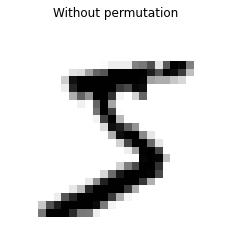

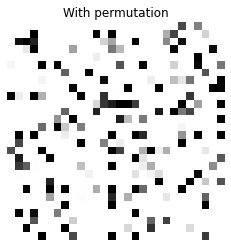

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 1s 862us/step - loss: 1.3640 - accuracy: 0.6437 - val_loss: 0.6666 - val_accuracy: 0.8393
Epoch 2/150
480/480 [==============================] - 0s 729us/step - loss: 0.5492 - accuracy: 0.8584 - val_loss: 0.4233 - val_accuracy: 0.8864
Epoch 3/150
480/480 [===

In [6]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

plt.figure()
plt.imshow(X_train[0].reshape(28, -1), cmap=plt.cm.binary)
plt.axis("off")
plt.title(f"Without permutation")
plt.show()

#permutation
seed = 0
tf.random.set_seed(seed)
np.random.seed(seed)
rng = np.random.RandomState(seed)

perm = rng.permutation(X_train.shape[1])
X_train = X_train[:, perm]
X_test = X_test[:, perm]

plt.figure()
plt.imshow(X_train[0].reshape(28, -1), cmap=plt.cm.binary)
plt.axis("off")
plt.title(f"With permutation")
plt.show()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

## 3.3 Sensitivity to Changes in the Data

To see that the feed-forward neural network for classifying handwritten digits from Chapter 3.6 is fit
to and limited by its training data, determine the accuracy that the model achieves when the test
data is inverted (i.e., dark pixels become light and vice versa).

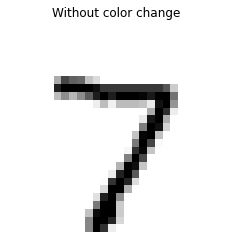

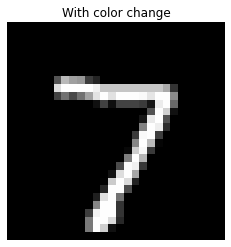

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 1s 860us/step - loss: 1.4090 - accuracy: 0.6088 - val_loss: 0.6873 - val_accuracy: 0.8407
Epoch 2/150
480/480 [==============================] - 0s 716us/step - loss: 0.5487 - accuracy: 0.8589 - val_loss: 0.4171 - val_accuracy: 0.8882
Epoch 3/150
480/480 [===

In [7]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.datasets import mnist

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

#invert colors for test
plt.figure()
plt.imshow(X_test[0].reshape(28, -1), cmap=plt.cm.binary)
plt.axis("off")
plt.title(f"Without color change")
plt.show()

X_test = 1 - X_test

plt.figure()
plt.imshow(X_test[0].reshape(28, -1), cmap=plt.cm.binary)
plt.axis("off")
plt.title(f"With color change")
plt.show()

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

## 3.4 Finding Confusing Data Points in the Test Data

Think about how you can systematically identify data points from the test data, for the feed-forward
neural network for classifying handwritten digits from Chapter 3.6, for which the model is confused
(i.e., uncertain how to classify it). How can you measure the confusion of the model? Output the
top-10 most confusing data points from the test data.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 1s 864us/step - loss: 1.3180 - accuracy: 0.6436 - val_loss: 0.6581 - val_accuracy: 0.8407
Epoch 2/150
480/480 [==============================] - 0s 773us/step - loss: 0.5471 - accuracy: 0.8559 - val_loss: 0.4276 - val_accuracy: 0.8840
Epoch 3/150
480/480 [===

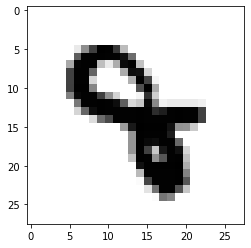

Actual Class: 8
Predicted Class: 4
Probability for 0: 0.000000
Probability for 1: 0.000001
Probability for 2: 0.000000
Probability for 3: 0.000002
Probability for 4: 0.999847
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.000037
Probability for 8: 0.000068
Probability for 9: 0.000045


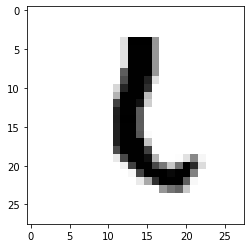

Actual Class: 6
Predicted Class: 1
Probability for 0: 0.000000
Probability for 1: 0.999625
Probability for 2: 0.000012
Probability for 3: 0.000002
Probability for 4: 0.000000
Probability for 5: 0.000000
Probability for 6: 0.000105
Probability for 7: 0.000000
Probability for 8: 0.000257
Probability for 9: 0.000000


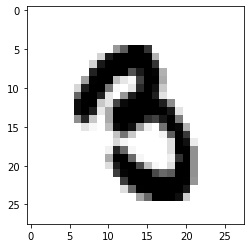

Actual Class: 3
Predicted Class: 8
Probability for 0: 0.000001
Probability for 1: 0.000000
Probability for 2: 0.000000
Probability for 3: 0.000001
Probability for 4: 0.000000
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.000000
Probability for 8: 0.999533
Probability for 9: 0.000465


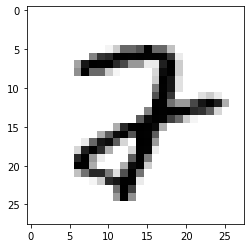

Actual Class: 2
Predicted Class: 8
Probability for 0: 0.000002
Probability for 1: 0.000000
Probability for 2: 0.000700
Probability for 3: 0.000032
Probability for 4: 0.000000
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.000152
Probability for 8: 0.999115
Probability for 9: 0.000000


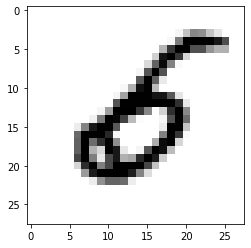

Actual Class: 5
Predicted Class: 6
Probability for 0: 0.000215
Probability for 1: 0.000000
Probability for 2: 0.000000
Probability for 3: 0.000007
Probability for 4: 0.000019
Probability for 5: 0.001194
Probability for 6: 0.998557
Probability for 7: 0.000000
Probability for 8: 0.000008
Probability for 9: 0.000000


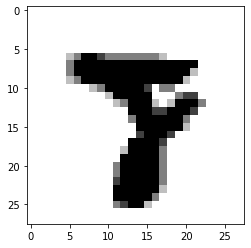

Actual Class: 8
Predicted Class: 7
Probability for 0: 0.000000
Probability for 1: 0.000000
Probability for 2: 0.000000
Probability for 3: 0.001277
Probability for 4: 0.000000
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.998333
Probability for 8: 0.000379
Probability for 9: 0.000010


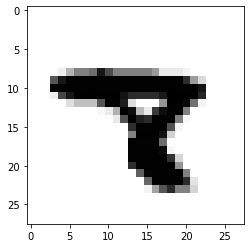

Actual Class: 8
Predicted Class: 7
Probability for 0: 0.000000
Probability for 1: 0.000030
Probability for 2: 0.001336
Probability for 3: 0.000465
Probability for 4: 0.000006
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.997944
Probability for 8: 0.000218
Probability for 9: 0.000000


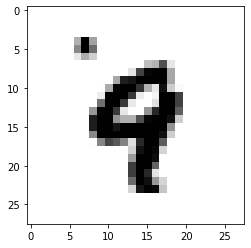

Actual Class: 9
Predicted Class: 4
Probability for 0: 0.000000
Probability for 1: 0.000024
Probability for 2: 0.000000
Probability for 3: 0.000000
Probability for 4: 0.997899
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.000007
Probability for 8: 0.000000
Probability for 9: 0.002069


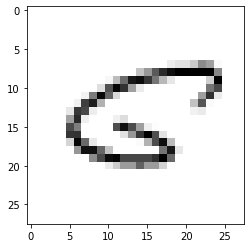

Actual Class: 6
Predicted Class: 5
Probability for 0: 0.001206
Probability for 1: 0.000021
Probability for 2: 0.000048
Probability for 3: 0.000005
Probability for 4: 0.000004
Probability for 5: 0.997428
Probability for 6: 0.000608
Probability for 7: 0.000043
Probability for 8: 0.000576
Probability for 9: 0.000062


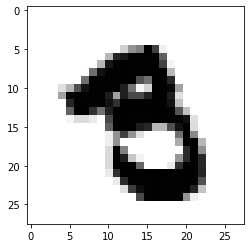

Actual Class: 3
Predicted Class: 8
Probability for 0: 0.000001
Probability for 1: 0.000000
Probability for 2: 0.000000
Probability for 3: 0.000006
Probability for 4: 0.000000
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.000000
Probability for 8: 0.997388
Probability for 9: 0.002604


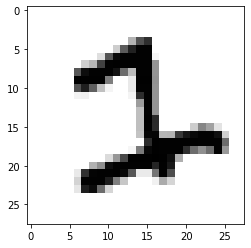

Actual Class: 1
Predicted Class: 2
Probability for 0: 0.000000
Probability for 1: 0.000503
Probability for 2: 0.997368
Probability for 3: 0.001887
Probability for 4: 0.000000
Probability for 5: 0.000035
Probability for 6: 0.000000
Probability for 7: 0.000208
Probability for 8: 0.000000
Probability for 9: 0.000000


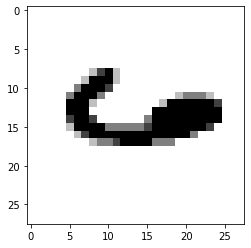

Actual Class: 6
Predicted Class: 4
Probability for 0: 0.000004
Probability for 1: 0.000000
Probability for 2: 0.000005
Probability for 3: 0.000000
Probability for 4: 0.997005
Probability for 5: 0.000000
Probability for 6: 0.000026
Probability for 7: 0.002005
Probability for 8: 0.000000
Probability for 9: 0.000956


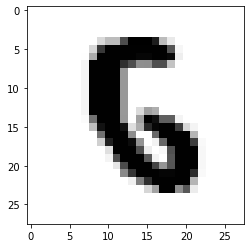

Actual Class: 6
Predicted Class: 5
Probability for 0: 0.000000
Probability for 1: 0.000000
Probability for 2: 0.000000
Probability for 3: 0.000000
Probability for 4: 0.000000
Probability for 5: 0.996999
Probability for 6: 0.001735
Probability for 7: 0.000000
Probability for 8: 0.001253
Probability for 9: 0.000013


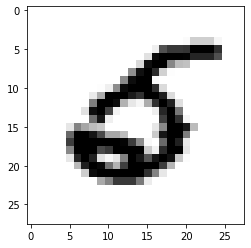

Actual Class: 5
Predicted Class: 6
Probability for 0: 0.000804
Probability for 1: 0.000000
Probability for 2: 0.000000
Probability for 3: 0.000003
Probability for 4: 0.000113
Probability for 5: 0.002337
Probability for 6: 0.996743
Probability for 7: 0.000000
Probability for 8: 0.000000
Probability for 9: 0.000000


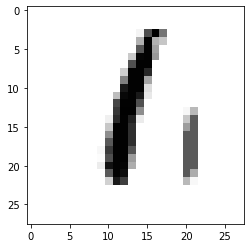

Actual Class: 1
Predicted Class: 6
Probability for 0: 0.000210
Probability for 1: 0.001937
Probability for 2: 0.000076
Probability for 3: 0.000019
Probability for 4: 0.000025
Probability for 5: 0.000907
Probability for 6: 0.996357
Probability for 7: 0.000000
Probability for 8: 0.000468
Probability for 9: 0.000000


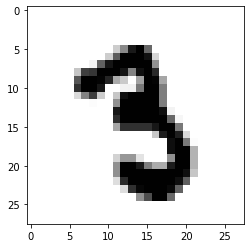

Actual Class: 3
Predicted Class: 8
Probability for 0: 0.000000
Probability for 1: 0.000001
Probability for 2: 0.000000
Probability for 3: 0.001158
Probability for 4: 0.000000
Probability for 5: 0.000005
Probability for 6: 0.000000
Probability for 7: 0.000000
Probability for 8: 0.996193
Probability for 9: 0.002643


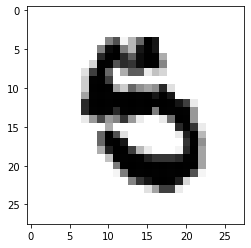

Actual Class: 5
Predicted Class: 8
Probability for 0: 0.000049
Probability for 1: 0.000002
Probability for 2: 0.000001
Probability for 3: 0.000135
Probability for 4: 0.000000
Probability for 5: 0.001735
Probability for 6: 0.000109
Probability for 7: 0.000000
Probability for 8: 0.996060
Probability for 9: 0.001910


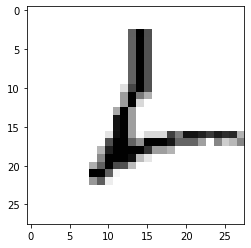

Actual Class: 2
Predicted Class: 6
Probability for 0: 0.000065
Probability for 1: 0.000018
Probability for 2: 0.002152
Probability for 3: 0.000050
Probability for 4: 0.000020
Probability for 5: 0.001821
Probability for 6: 0.995872
Probability for 7: 0.000000
Probability for 8: 0.000002
Probability for 9: 0.000000


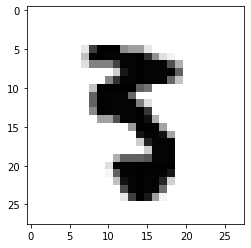

Actual Class: 3
Predicted Class: 5
Probability for 0: 0.000000
Probability for 1: 0.000068
Probability for 2: 0.000001
Probability for 3: 0.003983
Probability for 4: 0.000000
Probability for 5: 0.995782
Probability for 6: 0.000000
Probability for 7: 0.000023
Probability for 8: 0.000141
Probability for 9: 0.000002


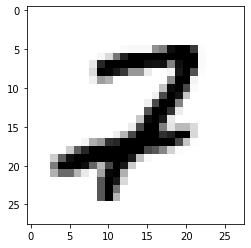

Actual Class: 7
Predicted Class: 2
Probability for 0: 0.000000
Probability for 1: 0.000000
Probability for 2: 0.995706
Probability for 3: 0.002047
Probability for 4: 0.000000
Probability for 5: 0.000000
Probability for 6: 0.000000
Probability for 7: 0.002245
Probability for 8: 0.000002
Probability for 9: 0.000000


In [8]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
from keras.datasets import mnist

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

#20 worst d.p. (worst = highest prob despite wrong prediciton)
prob = model.predict(X_test)
predict = np.argmax(prob, axis=-1)
X_fil = X_test[y_test != predict]
y_fil=y_test[y_test != predict]
prob_fil = prob[y_test != predict]
predict_fil = predict[y_test != predict]
#maximal prob per dp
idx = np.argmax(prob_fil, axis=-1)
prob = prob_fil[np.arange(len(prob_fil)), idx]

sort = prob.argsort()[::-1][:20]
X_fil = X_fil[sort]
y_fil = y_fil[sort]
prob_fil = prob_fil[sort]
predict_fil = predict_fil[sort]

for i in range(0,20):
    digit = X_fil[i].reshape(28, -1)
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    print('Actual Class: %d' % y_fil[i])
    print('Predicted Class: %d' % predict_fil[i])
    for j in range(0, 10):
        print('Probability for %d: %f' % (j, prob_fil[i][j]))

## 3.5 Taking Word Frequencies into Account when Classifying Movie Reviews

As discussed in the lecture, word frequencies are not taken into account by the neural network
from Chapter 3.6 to classify movie reviews. Adapt the example code, so that word frequencies are
taken into account. The training and test data points should then no longer be binary vectors, but
components should reflect how often a word occurs in a movie review. How exactly do you determine
the components of the vectors? Do you see an improvement in performance?


In [9]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers

# number of most frequent words to consider
num_words = 5000

# load IMDB dataset using only the 5,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# let us print out one of the reviews (? indicates a non-frequent word)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Example review: " + decoded_review)

# for this example, we use a simple representation of reviews as binary 5,000-dimensional vectors
def vectorize_sequences(sequences, dimensions=num_words):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for s in sequence:
            results[i, sequence] += 1
    return results


print(train_data[0])
X_train = vectorize_sequences(train_data)
print(X_train[0])
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Example review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the